In [4]:
import pandas as pd

# Load the CSV file
demand = pd.read_csv('./input/Demand_History.csv')

# Set the 'demand_point_index' and year columns as the multi-level index
demand.set_index(['demand_point_index'] + [str(year) for year in range(2010, 2019)], inplace=True)

print(demand.head())


                                                                                                       x_coordinate  \
demand_point_index 2010     2011     2012     2013     2014     2015     2016     2017      2018                      
0                  0.352242 0.667932 0.958593 2.911901 4.338274 6.561995 8.454417 10.595324 13.119572           0.5   
1                  0.325940 0.591964 0.862652 2.589068 4.196034 5.745551 8.753195 11.126995 12.020091           1.5   
2                  0.373752 0.591890 0.969733 2.641432 3.541772 5.469161 8.414627 10.115336 14.018254           2.5   
3                  0.420686 0.584055 0.906547 2.378577 3.888121 5.846089 9.083868 12.424885 15.012302           3.5   
4                  0.475621 0.647940 0.981544 2.665400 4.218711 6.776609 8.851107 11.731131 16.355563           4.5   

                                                                                                       y_coordinate  
demand_point_index 2010     2011     2012     20

[]Load the demand history and EV infrastructure datasets using pandas.

[]Create a distance matrix based on the coordinates of demand points and supply points.

[]Use a suitable time series model (e.g. ARIMA, LSTM) to forecast EV charging demand for 2019 and 2020.

[]Calculate the demand-supply matrix for 2019 and 2020 using the forecasted demand and EV infrastructure details.

[]Define the objective function that calculates the overall cost based on the three cost components mentioned in the problem statement.

[]Define the constraints.

[]Use an optimization algorithm (e.g. Linear Programming, Gradient Descent) to find the optimal EV infrastructure for 2019 and 2020 that minimizes the overall cost under the given constraints.


In [5]:
import numpy as np

# load demand and supply point coordinates
demand_points = np.loadtxt('./input/Demand_History.csv', delimiter=',', skiprows=1, usecols=[1, 2])
supply_points = np.loadtxt('./input/exisiting_EV_infrastructure_2018.csv', delimiter=',', skiprows=1, usecols=[1, 2])

# calculate distance matrix
distance_matrix = np.zeros((len(demand_points), len(supply_points)))
for i, demand_point in enumerate(demand_points):
    for j, supply_point in enumerate(supply_points):
        distance_matrix[i][j] = np.linalg.norm(demand_point - supply_point)

print(distance_matrix)
np.savetxt('./output/distance_matrix.csv', distance_matrix, delimiter=",")


[[53.14215611 68.38785811 73.39766971 ... 41.81242567 56.71278449
  19.3785686 ]
 [52.20883581 67.8544489  72.77224371 ... 40.96146071 55.96843837
  18.39424899]
 [51.27802958 67.33166666 72.15525616 ... 40.11737262 55.23216692
  17.41171647]
 ...
 [45.52225335 24.75540076 15.95179219 ... 48.39291434 31.44214633
  72.91708351]
 [45.78153919 25.7324108  16.88316352 ... 48.92276036 32.04270174
  73.49639816]
 [46.06108022 26.71112249 17.8219737  ... 49.46714874 32.66283674
  74.0846814 ]]


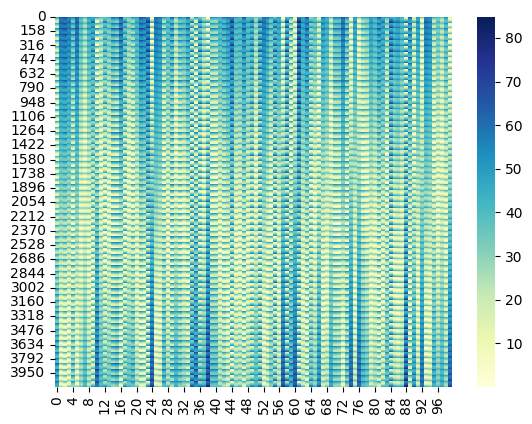

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'distance_matrix' is the distance matrix
sns.heatmap(distance_matrix, cmap="YlGnBu")
plt.show()


In [7]:
import numpy as np

demand_df = pd.read_csv('./input/Demand_History.csv')
supply_df = pd.read_csv('./input/exisiting_EV_infrastructure_2018.csv')

# Define parameters
r = 5 # radius of coverage
slow_charging_capacity = 200
fast_charging_capacity = 400

# Create 64x64 matrix
grid_matrix = np.zeros((64,64))

# Loop through demand points
for i in range(len(demand_df)):
    demand_point = demand_df.iloc[i]
    demand = demand_point['2018']
    x = demand_point['x_coordinate']
    y = demand_point['y_coordinate']

    # Loop through supply points within radius
    supply_capacity = 0
    for j in range(len(supply_df)):
        supply_point = supply_df.iloc[j]
        supply_x = supply_point['x_coordinate']
        supply_y = supply_point['y_coordinate']
        distance = ((x - supply_x)**2 + (y - supply_y)**2)**0.5
        slow_charging_stations = supply_point['existing_num_SCS']
        fast_charging_stations = supply_point['existing_num_FCS']
        supply_capacity += slow_charging_stations*slow_charging_capacity + fast_charging_stations*fast_charging_capacity
        
    
    # Calculate demand-supply gap and fill in grid_matrix
    gap = demand - supply_capacity
    row = int(y/1000) # assuming each row is 1000 meters wide
    col = int(x/1000) # assuming each column is 1000 meters wide
    grid_matrix[row][col] = gap
    
# Save output in CSV format
np.savetxt('./output/demand_supply_gap.csv', grid_matrix, delimiter=",")



In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.read_csv('./input/Demand_History.csv', delimiter=',')
X_train = df[['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']]
y_train = df['2018']

X_test = df[['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']]
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_2018 = model.predict(X_test)[0]
y_pred_2019 = model.predict(X_test)[1]

print('Predicted value for 2018:', y_pred_2018)
print('Predicted value for 2019:', y_pred_2019)


Predicted value for 2018: 17.636695627653825
Predicted value for 2019: 17.377845245725013


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the time series data into a pandas DataFrame
df = pd.read_csv('./input/Demand_History.csv')

# Split the data into a training set and a test set
train_data = df[:100]
test_data = df[100:]

# Analyze the time series data
plt.plot(df['date'], df['value'])
plt.show()

# Determine the order of differencing needed to make the time series stationary
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['value'])
plot_pacf(df['value'])
plt.show()

# Identify the parameters for the ARIMA model
model = ARIMA(train_data['value'], order=(2, 1, 2))
model_fit = model.fit()

# Evaluate the accuracy of the ARIMA model
predictions = model_fit.forecast(len(test_data))
error = mean_squared_error(test_data['value'], predictions)

# Use the ARIMA model to make forecasts for future time periods
future_predictions = model_fit.forecast(12)


KeyError: 'date'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load data into a Pandas DataFrame
df = pd.read_csv('./input/Demand_History.csv')


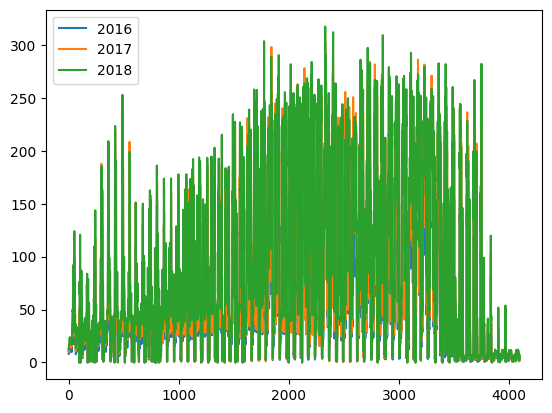

In [ ]:
# Plot the time series data
plt.plot(df['2016'], label='2016')
plt.plot(df['2017'], label='2017')
plt.plot(df['2018'], label='2018')
# ...
plt.legend()
plt.show()


In [ ]:
# Convert the DataFrame to a time series object
df = df.set_index('demand_point_index')
df.index = pd.to_datetime(df.index, format='%Y')


In [ ]:
# Split the data into training and testing sets
train = df.loc[:'2016']
test = df.loc['2017':]


In [43]:
# Fit the ARIMA model to the training data
model = ARIMA(train, order=(2, 1, 1))
model_fit = model.fit()

# Generate forecasts for the test data
forecast = model_fit.forecast(steps=len(test))[0]

# Plot the forecasts and the actual values
plt.plot(test, label='actual')
plt.plot(forecast, label='forecast')
plt.legend()
plt.show()


NameError: name 'train' is not defined

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load the data
data = pd.read_csv('./input/Demand_History.csv', index_col=0)

# Convert the data into a univariate time series
train = data.mean(axis=1)

# Fit the ARIMA model to the training data
model = ARIMA(train, order=(2, 1, 1))
model_fit = model.fit()

# Generate forecasts for the test data
forecast = model_fit.forecast(steps=2)
print(forecast)

# # Print the predicted values
# print("Predicted value for 2018:", forecast)
# print("Predicted value for 2019:", forecast)


4096    13.984483
4097    13.928151
Name: predicted_mean, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# load data into pandas DataFrame
df = pd.read_csv("./input/Demand_History.csv")

# split data into training and testing sets
train = df.iloc[:,3:10].values.flatten()
test = df.iloc[:,11:12].values.flatten()

# define function to fit ARIMA model and make predictions
def arima_forecast(train, test):
    history = list(train)
    predictions = []
    for t in range(len(test)):
        model = ARIMA(history, order=(1,1,1))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    return predictions

# make predictions using ARIMA model
predictions = arima_forecast(train, test)
print(predictions)

# calculate mean squared error of predictions
#mse = mean_squared_error(test['predicted_mean'].values, predictions)
#print("Mean Squared Error:", mse)


In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore", message="No frequency information was provided")
warnings.filterwarnings("ignore", message="Non-stationary starting autoregressive parameters found")
warnings.filterwarnings("ignore", message="Non-invertible starting MA parameters found")

# Load the data
data = pd.read_csv('./input/Demand_History.csv', index_col=0, parse_dates=True,)


# Loop over each demand point index and fit the ARIMA model
forecasts = {}
for demand_point_index in data.index:
    # Convert the data into a univariate time series
    train = data.loc[demand_point_index, '2010':]
    
    # Fit the ARIMA model to the training data
    model = ARIMA(train, order=(2, 1, 1))
    model_fit = model.fit()

    # Generate forecasts for the next 2 years
    forecast = model_fit.forecast(steps=2)
    forecasts[demand_point_index] = forecast
    
# Create a new DataFrame to store the forecasts
forecast_df = pd.DataFrame(index=data.index, columns=['2019', '2020'])

# Loop over each demand point index and store the forecasts in the DataFrame
for demand_point_index, forecast in forecasts.items():
    forecast_df.loc[demand_point_index, :] = forecast

# Save the forecasts to a CSV file
forecast_df.to_csv('forecasts.csv', header=['2019', '2020'])


In [ ]:
import multiprocessing as mp
# Define a function to fit the ARIMA model to a single demand point index
def fit_arima(demand_point_index):
    print(demand_point_index)
    train = data.loc[demand_point_index, '2010':]
    model = ARIMA(train, order=(2, 1, 1))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=2)
    return (demand_point_index, forecast)

# Create a pool of worker processes
pool = mp.Pool()

# Fit the ARIMA models in parallel
results = pool.map(fit_arima, data.index)

# Save the forecasts to a DataFrame
forecast_df = pd.DataFrame(index=data.index, columns=['2019', '2020'])
for demand_point_index, forecast in results:
    forecast_df.loc[demand_point_index, :] = forecast
forecast_df.to_csv('forecasts.csv', header=['2019', '2020'])


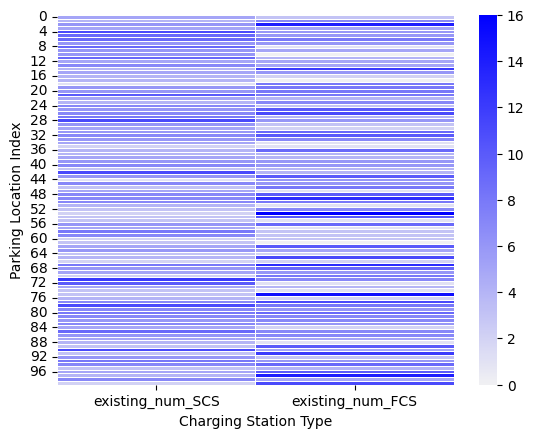

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('./input/exisiting_EV_infrastructure_2018.csv')

# Define the color scale
cmap = sns.light_palette("blue", as_cmap=True)

# Create the heatmap
heatmap = sns.heatmap(data[['existing_num_SCS', 'existing_num_FCS']], cmap=cmap, linewidths=.5)

# Add labels
heatmap.set_xlabel('Charging Station Type')
heatmap.set_ylabel('Parking Location Index')

# Show the plot
plt.show()


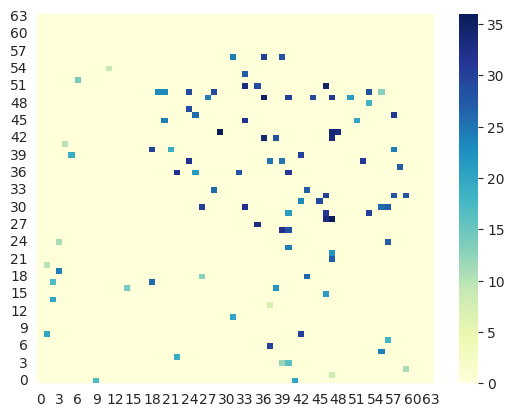

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the supply point data from a CSV file
supply_points = pd.read_csv('./input/exisiting_EV_infrastructure_2018.csv')

# Convert x and y coordinates to integers
supply_points['x_coordinate'] = supply_points['x_coordinate'].astype(int)
supply_points['y_coordinate'] = supply_points['y_coordinate'].astype(int)

# Create a 2D grid of parking slots
grid = np.zeros((64, 64))
for index, row in supply_points.iterrows():
    x = row['x_coordinate']
    y = row['y_coordinate']
    slots = row['total_parking_slots']
    grid[x, y] = slots

# Create a heatmap using seaborn
sns.set_style("whitegrid")
ax = sns.heatmap(grid, cmap="YlGnBu")
ax.invert_yaxis()  # Invert the y-axis to match the demand map
plt.show()


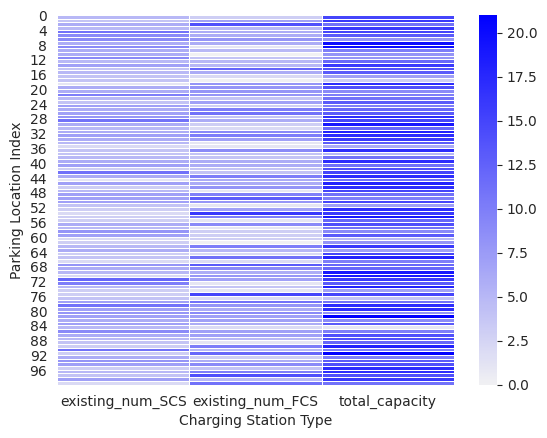

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('./input/exisiting_EV_infrastructure_2018.csv')

# Define the color scale
cmap = sns.light_palette("blue", as_cmap=True)

# Create a new column for total parking capacity
data['total_capacity'] = data['total_parking_slots'] - data['existing_num_SCS'] - data['existing_num_FCS']

# Create the heatmap
heatmap = sns.heatmap(data[['existing_num_SCS', 'existing_num_FCS', 'total_capacity']], cmap=cmap, linewidths=.5)

# Add labels
heatmap.set_xlabel('Charging Station Type')
heatmap.set_ylabel('Parking Location Index')

# Show the plot
plt.show()


In [11]:
data = pd.read_csv('./input/exisiting_EV_infrastructure_2018.csv')
print(data.head())
# calculate remaining supply
data['remaining_supply'] = data['total_parking_slots'] - data['existing_num_SCS'] - data['existing_num_FCS']

# calculate current supply
data['current_supply'] = data['existing_num_SCS'] + data['existing_num_FCS']


print(data.head())

   supply_point_index  x_coordinate  y_coordinate  total_parking_slots  \
0                   0     50.163110     19.412014                   23   
1                   1     37.336451     58.119225                   27   
2                   2     46.709232     57.525650                   31   
3                   3     30.528626     55.379835                   26   
4                   4     51.521781     35.116755                   32   

   existing_num_SCS  existing_num_FCS  
0                 5                 3  
1                 4                 7  
2                 6                14  
3                 5                 5  
4                11                 6  
   supply_point_index  x_coordinate  y_coordinate  total_parking_slots  \
0                   0     50.163110     19.412014                   23   
1                   1     37.336451     58.119225                   27   
2                   2     46.709232     57.525650                   31   
3                  

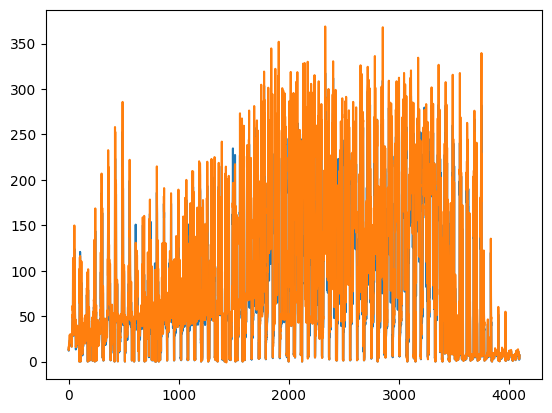

In [10]:
import pandas as pd

demand = pd.read_csv('./input/Demand_History.csv')
forcastdata = pd.read_csv('./forecast.csv')

# merge the data
merged_data = pd.merge(demand, forcastdata, on='demand_point_index')

# plot a graph to show differace in 2018 and 2019 
plt.plot(merged_data['2018'])
plt.plot(merged_data['2019'])
plt.show()

In [22]:
import pandas as pd
import numpy as np

# Load the demand and supply data
demand = pd.read_csv("./input/Demand_History.csv")
supply = pd.read_csv("./input/exisiting_EV_infrastructure_2018.csv")

# Calculate the distance matrix between demand and supply points
demand_coords = demand[["x_coordinate", "y_coordinate"]].values
supply_coords = supply[["x_coordinate", "y_coordinate"]].values
distances = np.sqrt(((demand_coords[:, None] - supply_coords) ** 2).sum(axis=2))


# Find the index of the nearest supply point for each demand point
nearest_supply_idx = np.argmin(distances, axis=1)
demand["nearest_supply_idx"] = nearest_supply_idx

# Calculate the total demand, total supply, and total number of EVs that can be charged
total_demand = demand["2018"].sum()
total_supply = supply["total_parking_slots"].sum()
total_charging_capacity = supply["existing_num_SCS"].sum() + 2 * supply["existing_num_FCS"].sum()

# Calculate the demand and supply for each supply point
supply_demand = demand.groupby("nearest_supply_idx")["2018"].sum().reset_index()
supply_demand = pd.merge(supply_demand, supply[["total_parking_slots", "existing_num_SCS", "existing_num_FCS"]], left_on="nearest_supply_idx", right_index=True)
supply_demand.rename(columns={"2018": "demand"}, inplace=True)
supply_demand["supply"] = supply_demand["total_parking_slots"] - supply_demand["existing_num_SCS"] - supply_demand["existing_num_FCS"]

# Calculate the supply-demand gap for each supply point
supply_demand["gap"] = supply_demand["demand"] - supply_demand["supply"]
supply_demand["gap_pct"] = supply_demand["gap"] / supply_demand["demand"]

# Print the results
print(supply_demand)
print(f"Total demand: {total_demand}")
print(f"Total supply: {total_supply}")
print(f"Total charging capacity: {total_charging_capacity}")


    nearest_supply_idx       demand  total_parking_slots  existing_num_SCS  \
0                    0  2345.586514                   23                 5   
1                    1  3616.904998                   27                 4   
2                    2  1751.768040                   31                 6   
3                    3  1923.074330                   26                 5   
4                    4   505.081864                   32                11   
..                 ...          ...                  ...               ...   
95                  95  3903.100707                   24                 3   
96                  96  7802.061217                   32                 5   
97                  97  5901.523253                   32                 4   
98                  98  2429.419762                   28                 7   
99                  99   759.222078                   24                 2   

    existing_num_FCS  supply          gap   gap_pct  
0        

In [ ]:
import pandas as pd

# Read the demand and supply data
demand = pd.read_csv("./merged_data.csv")
supply = pd.read_csv("./input/exisiting_EV_infrastructure_2018.csv")

# Calculate the distance matrix between demand and supply points
X = supply[["x_coordinate", "y_coordinate"]].values
Y = demand[["x_coordinate", "y_coordinate"]].values
distances = np.sqrt(((Y[:, None, :] - X)**2).sum(axis=2))

# Find the nearest supply point for each demand point
nearest_supply_idx = np.argmin(distances, axis=1)
demand["nearest_supply_idx"] = nearest_supply_idx

# Calculate the total demand, total supply, and total number of EVs that can be charged
total_demand = demand["2019"].sum() + demand["2020"].sum()
total_supply = supply["total_parking_slots"].sum()
total_charging_capacity = supply["total_parking_slots"].sum() * 2

# Calculate the demand-supply gap for the years 2019 and 2020
demand_2019 = demand["2019"].sum()
supply_2019 = supply.groupby("nearest_supply_idx")["existing_num_SCS"].sum().sum()
gap_2019 = demand_2019 - supply_2019

demand_2020 = demand["2020"].sum()
supply_2020 = supply.groupby("nearest_supply_idx")["existing_num_SCS"].sum().sum()
gap_2020 = demand_2020 - supply_2020

# Print the results
print("Total demand for 2019 and 2020:", total_demand)
print("Total supply for 2018:", total_supply)
print("Total charging capacity for 2018:", total_charging_capacity)
print("Demand-supply gap for 2019:", gap_2019)
print("Demand-supply gap for 2020:", gap_2020)


In [25]:
import numpy as np

# Create a matrix to store the distance between each demand and supply point
distance_matrix = np.zeros((4096, 100))

# Loop over each demand point and calculate its distance to all supply points
for demand_idx in range(4096):
    demand_x = demand.loc[demand_idx, "x_coordinate"]
    demand_y = demand.loc[demand_idx, "y_coordinate"]
    for supply_idx in range(100):
        supply_x = supply.loc[supply_idx, "x_coordinate"]
        supply_y = supply.loc[supply_idx, "y_coordinate"]
        distance_matrix[demand_idx, supply_idx] = np.sqrt((demand_x - supply_x) ** 2 + (demand_y - supply_y) ** 2)


In [54]:
import pandas as pd
import numpy as np

# Load the demand data
demand = pd.read_csv("./merged_data.csv")

# Load the supply data
supply = pd.read_csv("./input/exisiting_EV_infrastructure_2018.csv")


# Find the nearest supply point for each demand point
nearest_supply_idx = np.argmin(distance_matrix, axis=1)

# Add the nearest supply point index to the demand data
demand["nearest_supply_idx"] = nearest_supply_idx

# save it to merged_data.csv
demand.to_csv("./merged_data.csv", index=False)


# initialize empty columns for demand-supply gaps
demand["2019_gap"] = np.nan
demand["2020_gap"] = np.nan

# calculate demand, supply, and demand-supply gap for each demand point
for demand_idx, demand_row in demand.iterrows():
    # get the nearest supply point to the demand point
    supply_idx = demand_row["nearest_supply_index"]
    
    # calculate demand for each year
    for year in range(2018, 2019):
        # demand for parking slot for year 2019
        demand_year = demand_row[str(year)]
        print(demand_year)
        
        # calculate supply for the nearest supply point for the same year
        supply_year = supply.loc[supply_idx, f"existing_num_SCS"] + supply.loc[supply_idx, f"existing_num_FCS"]
        print(supply_year)
        
        
        # calculate demand-supply gap
        gap_year = demand_year - supply_year
        print(gap_year)

        # for demand_year and supply_year and gap year save this data for the demand point into merged_data.csv
        demand.loc[demand_idx, f"{year}_gap"] = gap_year
        demand.loc[demand_idx, f"{year}_demand"] = demand_year
        demand.loc[demand_idx, f"{year}_supply"] = supply_year
        # save data to merged_data.csv
        demand.to_csv("./merged_data.csv", index=False)
        

# print the resulting demand-supply gaps for each demand point for both years
print(demand[["demand_point_index", "x_coordinate", "y_coordinate", "2019_gap", "2020_gap"]])





13.1195720636842
9
4.119572063684201
12.0200908662586
9
3.0200908662586006
14.018253749831
9
5.0182537498310005
15.0123021166139
9
6.012302116613901
16.3555630541119
9
7.355563054111901
17.5599977477561
9
8.5599977477561
19.6964153225657
9
10.696415322565699
19.3674174996837
9
10.3674174996837
21.89984748714
9
12.89984748714
21.765241299637
9
12.765241299637001
22.6046928236102
9
13.6046928236102
23.9195815325912
9
14.919581532591199
19.5943464953047
10
9.594346495304698
21.4389105868665
10
11.438910586866498
20.4692560733896
10
10.469256073389602
22.4834648667962
10
12.4834648667962
23.0403483042428
6
17.0403483042428
22.2749725879616
6
16.2749725879616
20.1175287554677
5
15.1175287554677
18.328206470825
5
13.328206470824998
19.8694758475136
5
14.869475847513598
18.8729223702988
5
13.872922370298799
22.0137065188707
5
17.0137065188707
21.7823971688778
5
16.7823971688778
21.2346035504306
4
17.2346035504306
17.6965454178435
4
13.696545417843499
18.3155054007846
4
14.315505400784598
18.0

KeyboardInterrupt: 